In [102]:
#reading in excel file
import pandas as pd
data = pd.read_excel('/Users/lukelambert/Desktop/NCAA_XC.xlsx', sheet_name=None)

df = data['Women 2018']
print(df.columns)


Index(['placement', 'name', 'time', 'team', 'year', 'race1 name',
       'placement.1', 'time.1', 'race2 name', 'placement.2', 'time.2',
       'race 3name', 'placement.3', 'time.3', 'conference', 'placement.4',
       'time.4', 'region', 'placement.5', 'time.5', 'prior NCAA place',
       'time.6'],
      dtype='object')


In [103]:
#renaming columns
keep = ['placement', 'name', 'time', 'team', 'year', 'conference', 'placement.4', 'region', 'placement.5', 'prior NCAA place']
df = df[keep]
temp = df.rename(columns={'placement': 'ncaaPlace', 'placement.4': 'conferencePlace', 'placement.5': 'regionPlace', 'prior NCAA place': 'ncaaPriorPlace', 'time': 'ncaaTime'}, inplace=False)
df = temp

In [104]:
#fixing the placement columns
import numpy as np
import re

df.fillna('n/a', inplace=True)
def ordinal_to_int(ordinal_str):
    if ordinal_str == 'n/a':
        return np.nan
    return int(''.join(filter(str.isdigit, ordinal_str)))

df['conferencePlace'] = df['conferencePlace'].apply(ordinal_to_int)
df['regionPlace'] = df['regionPlace'].apply(ordinal_to_int)
df['ncaaPriorPlace'] = df['ncaaPriorPlace'].apply(ordinal_to_int)

print(df[df['ncaaPlace'] == 244])

     ncaaPlace                   name         ncaaTime          team  year  \
243        244  Grace Fetherstonhaugh  00:22:48.900000  Oregon State  FR-1   

    conference conferencePlace region regionPlace ncaaPriorPlace  
243     Pac-12             n/a   West         150            n/a  


     ncaaPlace                  name         ncaaTime                team  \
0            1            Dani Jones  00:19:42.800000            Colorado   
1            2          Weini Kelati  00:19:45.300000          New Mexico   
2            3          Jessica Hull  00:19:50.400000              Oregon   
3            4         Alicia Monson  00:19:55.200000           Wisconsin   
4            5          Ednah Kurgat  00:19:55.800000          New Mexico   
5            6       Allie Ostrander  00:19:56.900000         Boise State   
7            8         Makena Morley  00:20:00.100000            Colorado   
8            9      Charlotte Prouse  00:20:02.100000          New Mexico   
10          11          Elise Cranny  00:20:02.800000            Stanford   
11          12        Weronika Pyzik  00:20:03.400000              Oregon   
13          14         Dorcas Wasike  00:20:08.200000          Louisville   
15          16            Elly Henes  00:20:11.600000  North Carolina St.   

ValueError: data type <class 'numpy.object_'> not inexact

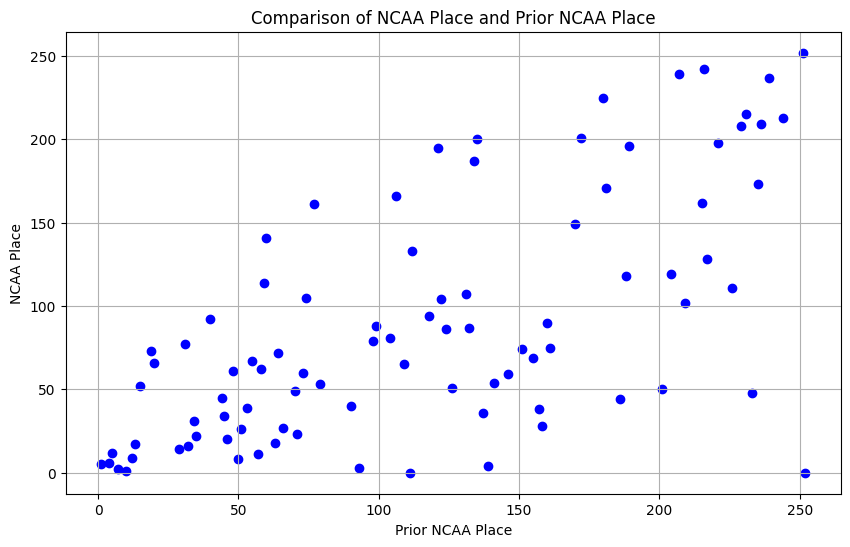

In [106]:
#comparison of NCAA Place and Prior NCAA Place

import matplotlib.pyplot as plt
import numpy as np


filtered_df = df[df['ncaaPriorPlace'] != 'n/a']

# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['ncaaPriorPlace'], filtered_df['ncaaPlace'], color='blue')

plt.xlabel('Prior NCAA Place')
plt.ylabel('NCAA Place')
plt.title('Comparison of NCAA Place and Prior NCAA Place')
plt.grid(True)

print(filtered_df)

# Compute the best fit line (least squares regression)
slope, intercept = np.polyfit(filtered_df['ncaaPriorPlace'], filtered_df['ncaaPlace'], 1)
regression_line = slope * filtered_df['ncaaPriorPlace'] + intercept

# Plot the regression line
plt.plot(filtered_df['ncaaPriorPlace'], regression_line, color='red', linestyle='--')

plt.show()

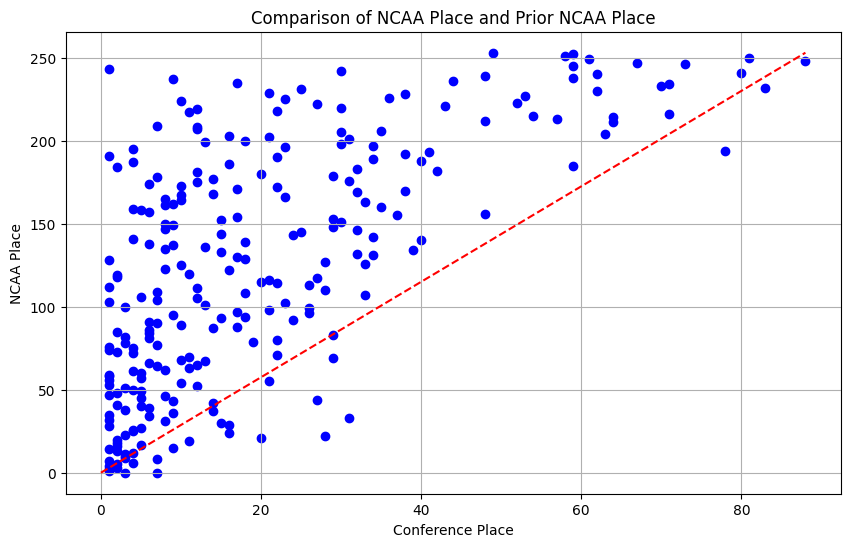

In [ ]:
filtered_df = df[df['conferencePlace'] != 'n/a']
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['conferencePlace'], filtered_df['ncaaPlace'], color='blue')

plt.xlabel('Conference Place')
plt.ylabel('NCAA Place')
plt.title('Comparison of NCAA Place and Prior NCAA Place')
plt.grid(True)

# Optionally, add a line for reference
plt.plot([0, max(filtered_df['conferencePlace'])], [0, max(filtered_df['ncaaPlace'])], color='red', linestyle='--')

plt.show()